<h1 style="font-family:Futura;font-size:30px;text-align:center;">Supervised Learning: Linear Regression</h1><hr> </br>
In this section, we will be going over linear regression.  We will be going over how to use the scikit-learn regression model, as well as how to train the regressor using the fit() method, and how to predict new labels using the predict() method.  We'll be analyzing a data set consisting of house prices in Boston.  We'll start off with a single variable linear regression using numpy and then move on to using scikit learn.  We'll do an overview of the mathematics behind the method we're using, but mostly we'll dive deeper into the practical "hands-on" coding lessons.

We will be working through linear regression with the following steps:
<ol>
<li>Getting and setting up the data.</li>
<li>Visualizing current data.</li>
<li>The math behind the Least Squares Method.</li>
<li>Using Numpy or a Univariate Linear Regression.</li>
<li>Getting the error.</li>
<li>Using scikit learn to implement a multivariate regression.</li>
<li>Using training and validation.</li>
<li>Predicting prices.</li>
<li>Residual Plots.</li>
</ol>

# Step 1: Getting and setting up the data
-Starting by looking at an example of a dataset from scikit-learn.  First we'll import our usual data analysis imports, then sklearn's built-in Boston dataset.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

from sklearn.datasets import load_boston

In [2]:
boston=load_boston()

In [3]:
#description of Boston dataset
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Text(0,0.5,'Number of houses')

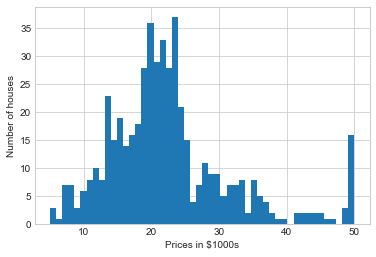

In [4]:
#always run a quick visualization of the data, histogram of the prices
#methods are particular to proprietary scikit learn data sets, target method is one such method
plt.hist(boston.target,bins=50)
plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

Text(0.5,0,'Number of Rooms')

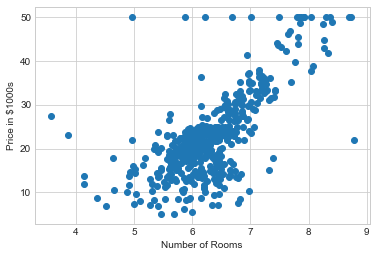

In [5]:
#scatterplot of single feature vs. target, housing price vs. number of rooms in dwelling
#RM (label of rooms per dwelling)
plt.scatter(boston.data[:,5],boston.target)
plt.ylabel('Price in $1000s')
plt.xlabel('Number of Rooms')

In [6]:
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
boston_df['Price'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


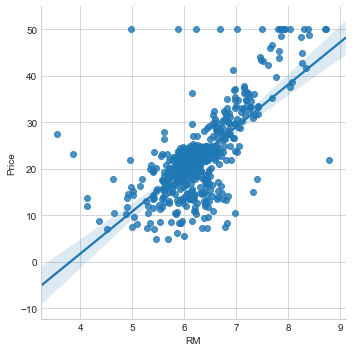

In [8]:
sns.lmplot('RM','Price',data=boston_df)

# Step 3: The Mathematics Behind the Least Squares Method
-Take a look at the plot created below using Seaborn.  Now consider each point, and know that they each have a coordinate in the form (X,Y).  Draw an imaginary line between each point and our current "best-fit" line.  We'll call the distance between each point and our current best-fit line, D.  To get a quick image of what we're currently trying to visualize, take a look at the picture below.

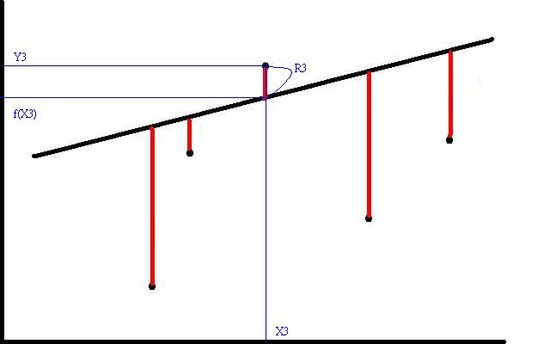

In [10]:
from IPython.display import Image
url = 'https://upload.wikimedia.org/wikiversity/en/thumb/2/2c/LLS.JPG/550px-LLS.JPG'
Image(url)

The line of best fit is (the least square) is found by approximating the points:

$$(X,Y)_1,(X,Y)_2,(X,Y)_3..$$

Our line has the equation:

$$Y = a_0 + a_1X$$

Which is basically a rewritten form of the equation:

$$Y = mx + b$$

We can solve for these constants a0 and a1 by simultaneously solving these equations:

$$\Sigma Y=Ia_0N+a_1\Sigma X$$
$$\Sigma XY=a_0\Sigma X+a_1\Sigma X^2$$

These are reffered to as the normal equations for the least squares line.  There are further steps that can be taken in rearranging these equations to solve for y, but SciKit-learn can also do most of the heavy lifting for us.

For now, we'll use Numpy to do a simple single variable linear regression.  Afterwards we'll unleash the power of SciKit learn to do a full multivariate linear regression.

# Step 4: Using Numpy for a Univariate Linear Regression

Numpy has a built in Least Square Method in its linar algebra library.  We'll use this first for our Univariate regression and then move on to SciKit-Learn for our multi variate regression.

We will start by setting up the X and Y arrays for Numpy to take in.  An important note for the X array: Numpy expects a two dimensional array, the first dimension is the different example values, and the second dimensions is the attrubute number.  In this case we have our value as the mean number of rooms per house, and this is a single attribute so the second dimension of the array is just 1.  So we'll need to create a (506, 1) shape array.  There are a few ways to do this, but an easy way to do this is by using Numpy's built-in vertical stack tool, <strong>vstack</strong>.

In [13]:
#Set up X as median room values
X = boston_df.RM #boston room column
X.shape

(506,)

In [15]:
#Use v to make X two-dimensional
X = np.vstack(boston_df.RM) #reshapes the array, since the linear algebra library requires
#number of attribues first
X.shape

(506, 1)

In [ ]:
#Set up Y as the target price of the houses
Y = boston_df.Price

Now that we have an X and Y, we can go ahead and use Numpy to create the single variable linear regression (<strong>Univariate Linear Reqression</strong>).

We know that a line has the equation:

$$y=mx+b$$

Which we can rewrite using matrices:

$$y=Ap$$

Where:

$$A = [\text{x  1}]$$

and

$$p= \left[
\begin{array}{c}
  m\\
  b
\end{array}
\right] $$